In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
new_york_city = pd.read_csv("/Users/nagashrinagaraj/Downloads/bikeshare/new_york_city.csv")
nyc = pd.DataFrame(new_york_city)
nyc.iloc[:,1:3] = nyc.iloc[:,1:3].apply(pd.to_datetime, errors = 'coerce')
nyc['Start Day'] = nyc['Start Time'].dt.weekday_name
nyc['Start Month'] = nyc['Start Time'].dt.month
nyc['Start_End Station'] = nyc[['Start Station', 'End Station']].apply(lambda x: ' to '.join(x), axis = 1)
nyc.head()




,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Start Day,Start Month,Start_End Station
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,Sunday,6,Suffolk St & Stanton St to W Broadway & Spring St
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,Thursday,5,Lexington Ave & E 63 St to 1 Ave & E 78 St
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,Wednesday,3,1 Pl & Clinton St to Henry St & Degraw St
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,Monday,5,Barrow St & Hudson St to W 20 St & 8 Ave
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,Wednesday,6,1 Ave & E 44 St to E 53 St & 3 Ave


In [190]:


def day_of_week(day):
    lst = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday','saturday', 'none']
    if not (day in lst):
        print("please try again")
        return -1
    else:
        print('You have selected {}'.format(day))
        return 1 

def get_city(firstRequest=True):

    if firstRequest:
        city = input('\nHello! Let\'s explore some US bikeshare data!\n'
                 'Would you like to see data for Chicago, New York, or Washington?\n')
    else:
        city = input('\n Sorry could not process! Please check the spelling\n')
        
    file_name = ''
    return city
'''
    if city.lower() == 'new york':
        file_name = new_york_city
    elif city.lower() == 'washington':
        file_name == washington
    elif city.lower() == 'chicago':
        file_name == chicago
    else:
        get_city(False)
        
    return file_name    
'''

def get_time_period(firstRequest=True):
    time_period = ''
    if firstRequest:
        time_period = input('\nWould you like to filter the data by month or day\n')
    else:
        time_period = input('\nPlease enter the correct filter data by month or day\n')

    return time_period 


def get_month(firstRequest=True):
    if firstRequest:
        month = input('\nSelect a month as an integer - January:1, February:2, March:3, April:4, May:5, June:6\n')
    else:
        month  = input('\nPlease input a number refering the month/n')
    return month



def get_day():

    i = 0
    lst = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday','saturday']

    while (i <= 3):
        i += 1
        day = ''
        day = input('\nPlease Select a day of the week - sunday, monday,tuesday,wednesday,thursday,friday,saturday)\n')
        
        if not (day in lst):
            if (i == 3):
                quit = input('\nDo you want to come back later? Y/N \n')
                if quit =='N':
                    i = 0
                else:
                    return ''
        else:
            print('You have selected {}'.format(day))
            return day

In [227]:
def main():
    city = get_city()
    day = get_day()
    mon = int(get_month())
    #time_period = get_time_period()
    #if len(city) > 0 and len(day) > 0 and month > 0: #and len(time_period) > 0:
    if city == 'new york':
        new_york_city = pd.read_csv("/Users/nagashrinagaraj/Downloads/bikeshare/new_york_city.csv")
        nyc = pd.DataFrame(new_york_city)
        nyc.iloc[:,1:3] = nyc.iloc[:,1:3].apply(pd.to_datetime, errors = 'coerce')
        nyc['Start Day'] = nyc['Start Time'].dt.weekday_name
        nyc['Start Month'] = nyc['Start Time'].dt.month
        city_analysis = nyc.loc[nyc['Start Month'] == mon] #& (nyc['Start Day']== day)]
        
        Total_Trip_Duration = (city_analysis['Trip Duration'].cumsum(axis = 0)).iloc[-1]
        print('Total_Trip_Duration for your filter is {}'.format(Total_Trip_Duration))
        
        Average_Trip_Duration = Total_Trip_Duration/len(city_analysis['Trip Duration'])
        print('Average Trip Duration for your filter is {}'.format(Average_Trip_Duration))
        
        #Popular_Trip = city_analysis['Start_End Station'].mode()
        #print('Popular Trip for your filter is {}'.format(Popular_Trip))
        
        sns.factorplot('User Type', data = city_analysis, kind='count')
        
        sns.factorplot('Start Day', data=nyc, kind='count', size=8 )
        ax = plt.gca()

        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(),'%d' % int(p.get_height()), fontsize=12, ha='center',va='bottom')
        plt.show()
        
        city_analysis.head()
        #return 1


Hello! Let's explore some US bikeshare data!
Would you like to see data for Chicago, New York, or Washington?
new york

Please Select a day of the week - sunday, monday,tuesday,wednesday,thursday,friday,saturday)
sunday
You have selected sunday

Select a month as an integer - January:1, February:2, March:3, April:4, May:5, June:6
1
1
Total_Trip_Duration for your filter is 23730278
Average Trip Duration for your filter is 744.315852205006


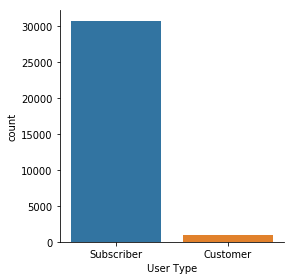

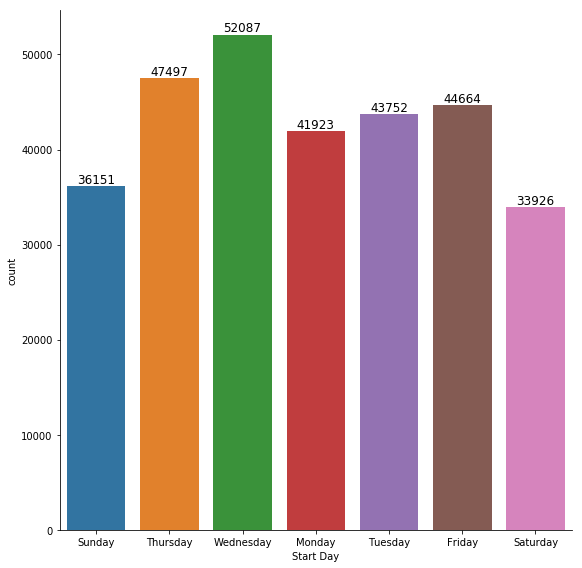

In [230]:
main()

In [111]:
day

'hg'

In [81]:
get_day()


Select a day of the week
sunday
You have selected sunday


'sunday'

In [46]:
day_of_week